# Matplotlib

Matplotlib adalah ekstensi matematika numerik NumPy dan paket yang bagus untuk melihat atau menyajikan data dalam format bergambar atau grafis. Ini memungkinkan analis dan pengambil keputusan untuk melihat analitik yang disajikan secara visual, sehingga mereka dapat memahami konsep yang sulit atau mengidentifikasi pola baru.

Topik bahasan:
* Menggunakan fungsi global
* Kustomisasi label axis
* Sebuah Sumbu atau Subplot (subclass dari Sumbu)
* Line Plots
    * Plot garis – menggunakan ax.plot()
    * Beberapa garis pada sumbu yang sama
    * Beberapa garis pada sumbu yang berbeda
    * Kontrol gaya garis dan gaya penanda    
* Bar Plots
    * Bar plots – menggunakan ax.bar() dan ax.barh()
    * Horizontal bar charts
    * Side by side bar chart
* Stacked bar
* Pie Chart
    * Pie Chart – menggunakan ax.pie()
* Plotting – defaults

Untuk menggunakan Matplotlib, kita harus install library ini.
```
pip install matplotlib
```

Informasi lebih lengkapnya, dapat diakses disini: https://matplotlib.org/ .\
Pembuat Matplotlib awalnya adalah John D. Hunter, https://en.wikipedia.org/wiki/John_D._Hunter


In [1]:
!pip install matplotlib

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import matplotlib     
%matplotlib inline  


In [3]:
matplotlib.__version__

'3.3.2'

In [4]:
# Sembunyikan semua pesan peringatan 
import warnings
warnings.filterwarnings('ignore')

Ada 2 cara umum menggunakan pyplot:
* Pendekatan paling umum dan mudah dalam menggunakan fungsi global untuk membangun dan menampilkan figur global menggunakan matplotlib sebagai mesin status global

* Cara kedua adalah berorientasi objek. Anda mendapatkan gambar kosong dari pabrik global, dan kemudian membangun plot secara eksplisit menggunakan metode Gambar dan kelas yang dikandungnya 

## Menggunakan Fungsi Global

* plt.bar – membuat diagram batang
* plt.scatter – membuat plot scatter
* plt.boxplot – membuat boxplot
* plt.hist – membuat histogram
* plt.plot – membuat plot garis 

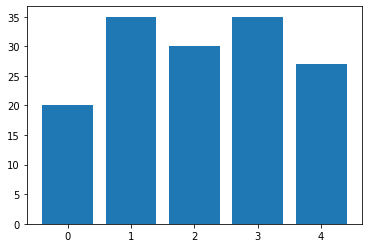

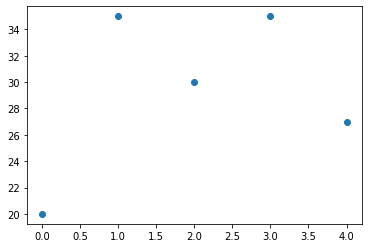

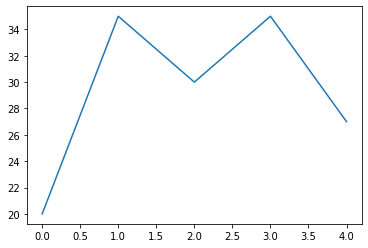

In [5]:
# simple bar and scatter plot
x = np.arange(5)          
y = (20, 35, 30, 35, 27)  
plt.bar(x,y)              # Bar plot

# perlu menutup gambar menggunakan show() atau close(), jika tidak ditutup, perintah plot lanjutan akan menggunakan gambar yang sama.
plt.show()                # komen ini untuk menjalankan
plt.scatter(x,y)          # scatter plot
plt.show()
plt.plot(x,y)
plt.show()

Histogram


array([[<AxesSubplot:title={'center':'Sepal.Length'}>,
        <AxesSubplot:title={'center':'Sepal.Width'}>],
       [<AxesSubplot:title={'center':'Petal.Length'}>,
        <AxesSubplot:title={'center':'Petal.Width'}>]], dtype=object)

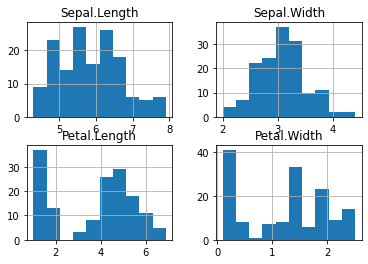

In [6]:
# Kita juga dapat membuat histogram, grafik garis, dan boxplot langsung pada kerangka data 
df = pd.read_csv('dataset/iris.csv')
print("Histogram")
df.hist()

Line graph


<AxesSubplot:>

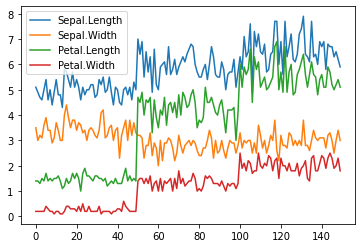

In [7]:
print("Line graph")
df.plot()

Box plot


<AxesSubplot:>

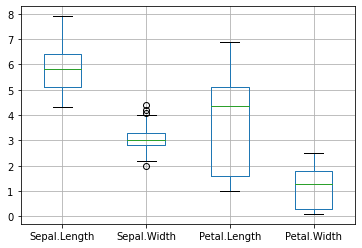

In [8]:
print("Box plot")
df.boxplot()

## Kustomisasi label axis

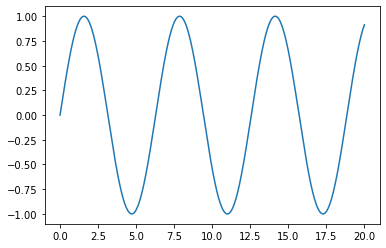

In [9]:
# buat data
x = np.linspace(0, 20, 1000)  #1000 data dari 0 ke 50
y = np.sin(x)

plt.plot(x, y) # buat line plot

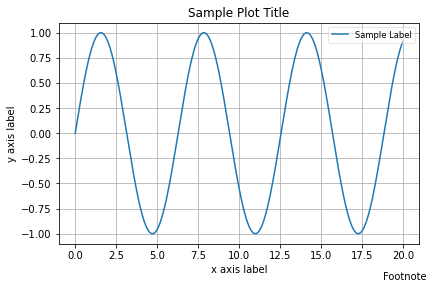

In [10]:
# kustomiasasi
plt.plot(x, y, label = 'Sample Label') 
plt.title('Sample Plot Title')                                # chart title 
plt.xlabel('x axis label')                                    # x axis title
plt.ylabel('y axis label')                                    # y axis title
plt.grid(True)                                                # tampilkan gridlines 
plt.figtext(0.995, 0.01, 'Footnote', ha='right', va='bottom') # tambah footnote
plt.legend(loc='best',framealpha=0.5,prop={'size':'small'}) # tambah legend, lokasi terbaik secara otomatis

# tight_layout() dapat mengambil argumen kata kunci pad, w_pad dan h_pad.
# ini mengontrol bantalan ekstra di sekitar batas gambar dan di antara subplot.
# Bantalan ditentukan dalam fraksi ukuran font. 
plt.tight_layout(pad=1)

In [11]:
# simpan ke file
plt.savefig('kustom1.png') 

<Figure size 432x288 with 0 Axes>

In [12]:
plt.close()  # Tutup jendela saat ini untuk memungkinkan pembuatan plot baru pada jendela / sumbu terpisah
# Atau kita dapat menggunakan show()
plt.show()   

## Sebuah Sumbu atau Subplot (subclass dari Sumbu) 

Sebuah Axes adalah kelas kontainer untuk plot tertentu. Sebuah gambar dapat berisi banyak Sumbu dan/atau Subplot. Subplot diletakkan dalam kotak di dalam Gambar. Sumbu dapat ditempatkan di mana saja pada Gambar. 

```
ax = fig.add_subplot(2,2,1) # row-col-num 
ax = fig.add_axes([0.1,0.1,0.8,0.8])
```

Kita dapat menggunakan pabrik subplot untuk mendapatkan Gambar dan semua Sumbu yang diinginkan sekaligus. 

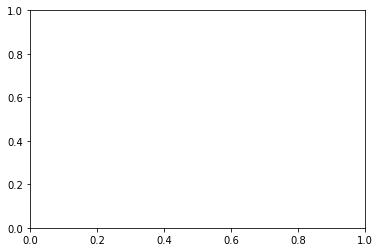

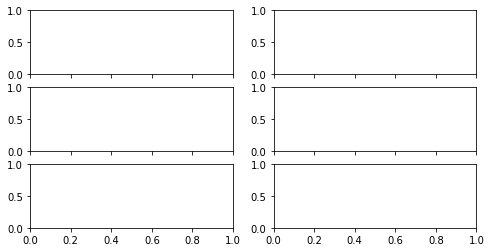

In [13]:
fig, ax = plt.subplots() 
fig,(ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=2, sharex=True, figsize=(8,4))

In [14]:
# Iterasi Sumbu dalam Gambar 
for ax in fig.get_axes():
    pass # do something 

Text(0.5, 0.98, 'Subplots')

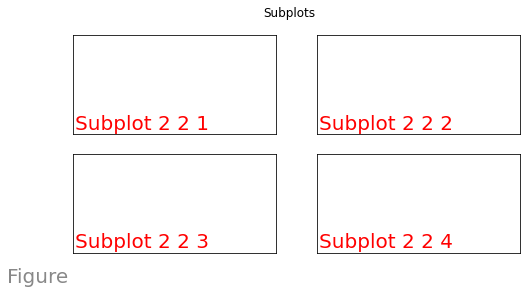

In [15]:
# Tata letak grid subplot sederhana 
fig = plt.figure(figsize=(8,4)) 
fig.text(x=0.01, y=0.01, s='Figure',color='#888888', ha='left', va='bottom', fontsize=20) 

for i in range(4):     
    # fig.add_subplot(nrows, ncols, num)     
    ax = fig.add_subplot(2, 2, i+1)      
    ax.text(x=0.01, y=0.01, s='Subplot 2 2 '+str(i+1),  color='red', ha='left', va='bottom', fontsize=20)    
    ax.set_xticks([]); ax.set_yticks([]) 
ax.set_xticks([]); ax.set_yticks([])
fig.suptitle('Subplots')

## Line Plots

### Line plots – menggunakan ax.plot() 

Plot tunggal dibangun dengan Gambar dan Sumbu 

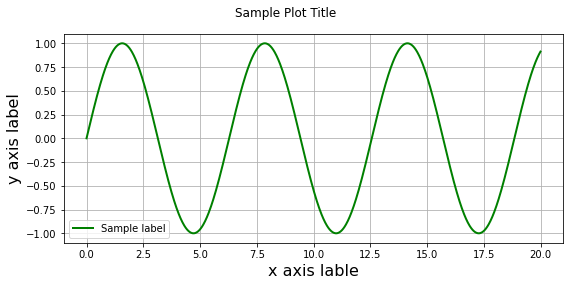

In [16]:
# menghasilkan data sampel 
x = np.linspace(0, 20, 1000)
y = np.sin(x)

fig = plt.figure(figsize=(8,4))                        # menddpatkan gambar kosong dan tambahkan Axes 
ax = fig.add_subplot(1,1,1)                            # row-col-num 
ax.plot(x, y, 'g-', linewidth=2, label='Sample label') # line plot data on the Axes 
# add title, labels and legend, etc. 
ax.set_ylabel('y axis label', fontsize=16)             # y label
ax.set_xlabel('x axis lable', fontsize=16)             # x label    
ax.legend(loc='best')                                  # legend
ax.grid(True)                                          # tampilkan grid
fig.suptitle('Sample Plot Title')                      # judul
fig.tight_layout(pad=1)                                # merapihkan laytout
fig.savefig('filename2.png', dpi=125)  

### Beberapa garis pada sumbu yang sama 

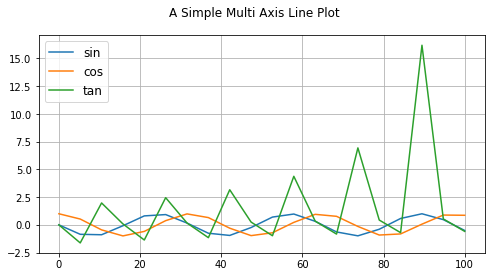

In [17]:
# dapatkan Gambar dan Sumbu sekaligus 
fig, ax = plt.subplots(figsize=(8,4))

x1 = np.linspace(0, 100, 20) 
x2 = np.linspace(0, 100, 20)
x3 = np.linspace(0, 100, 20)
y1 = np.sin(x1)
y2 = np.cos(x2)
y3 = np.tan(x3)

ax.plot(x1, y1, label='sin')
ax.plot(x2, y2, label='cos')
ax.plot(x3, y3, label='tan')

# tmbahkan grid, legend, judul dan simpan
ax.grid(True) 

ax.legend(loc='best', prop={'size':'large'}) 

fig.suptitle('A Simple Multi Axis Line Plot')
fig.savefig('filename3.png', dpi=125) 

### Beberapa garis pada sumbu yang berbeda

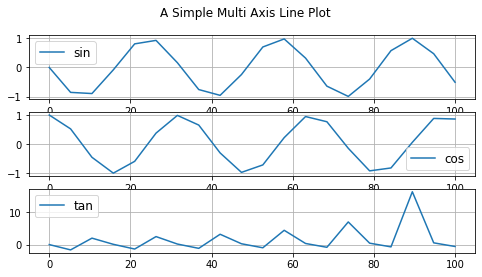

In [18]:
# Mengubah sharex ke True akan menggunakan sumbu x yang sama 
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=1, sharex=False, sharey = False, figsize=(8,4))

# plot beberapa lines 
x1 = np.linspace(0, 100, 20) 
x2 = np.linspace(0, 100, 20)
x3 = np.linspace(0, 100, 20)
y1 = np.sin(x1)
y2 = np.cos(x2)
y3 = np.tan(x3)

ax1.plot(x1, y1, label='sin')
ax2.plot(x2, y2, label='cos')
ax3.plot(x3, y3, label='tan')

# add grid, legend, title and save 
ax1.grid(True) 
ax2.grid(True)
ax3.grid(True)

ax1.legend(loc='best', prop={'size':'large'}) 
ax2.legend(loc='best', prop={'size':'large'}) 
ax3.legend(loc='best', prop={'size':'large'}) 

fig.suptitle('A Simple Multi Axis Line Plot')
fig.savefig('multiple-line.png', dpi=125) 

### Kontrol gaya garis dan gaya penanda 

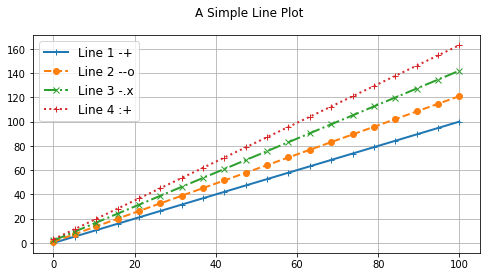

In [20]:
# dapatkan Gambar dan Sumbu sekaligus 
fig, ax = plt.subplots(figsize=(8,4)) 

# plot beberapa baris 
N = 4 # jumlah garis yang akan kita plot 
styles =  ['-', '--', '-.', ':'] 
markers = list('+ox') 
x = np.linspace(0, 100, 20) 
for i in range(N): # tambah line-by-line     
    y = x + x/5*i + i     
    s = styles[i % len(styles)]     
    m = markers[i % len(markers)]     
    ax.plot(x, y, alpha = 1, label='Line '+str(i+1)+' '+s+m,       
                  marker=m, linewidth=2, linestyle=s) 
# tambah grid, legend, title dan save 
ax.grid(True) 
ax.legend(loc='best', prop={'size':'large'}) 
fig.suptitle('A Simple Line Plot')
fig.savefig('filename6.png', dpi=125) 

## Bar Plots

### Bar plots – menggunakan ax.bar() and ax.barh() 

Bar chart sederhana

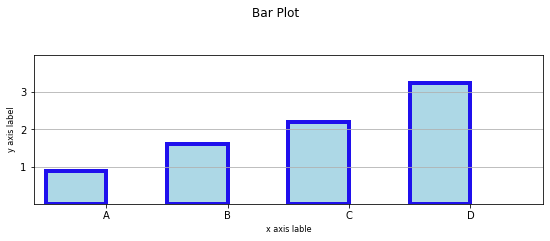

In [24]:
# ambil data
N = 4 
labels = list('ABCD') 
data = np.array(range(N)) + np.random.rand(N)

#plot data 
fig, ax = plt.subplots(figsize=(8, 3.5)) 
width = 0.5;  
tickLocations = np.arange(N) 
rectLocations = tickLocations-(width/2.0) 

# untuk warna baik nilai HEX dari nama warna dapat digunakan 
ax.bar(rectLocations, data, width,      
       color='lightblue',     
       edgecolor='#1f10ed', linewidth=4.0) 
# tidy-up the plot 
ax.set_xticks(ticks= tickLocations)
ax.set_xticklabels(labels) 
ax.set_xlim(min(tickLocations)-0.6, max(tickLocations)+0.6) 
ax.set_yticks(range(N)[1:]) 
ax.set_ylim((0,N)) 
ax.set_ylabel('y axis label', fontsize=8)             # y label
ax.set_xlabel('x axis lable', fontsize=8)             # x label    
ax.yaxis.grid(True)
# title dan save 
fig.suptitle("Bar Plot") 
fig.tight_layout(pad=2) 
fig.savefig('barplot.png', dpi=125)

### Horizontal bar charts 

Sama seperti penempatan centang perlu dikelola dengan batang vertikal; jadi dengan batang horizontal yang berada di atas tanda y 

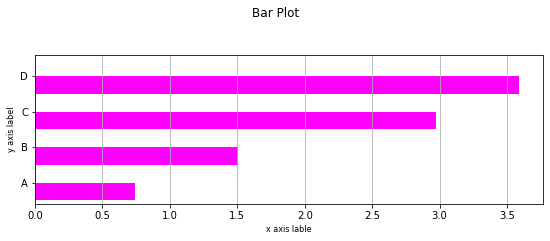

In [25]:
# ambil data
N = 4 
labels = list('ABCD') 
data = np.array(range(N)) + np.random.rand(N)

#plot data 
fig, ax = plt.subplots(figsize=(8, 3.5)) 
width = 0.5;  
tickLocations = np.arange(N) 
rectLocations = tickLocations-(width/2.0) 

# untuk warna baik nilai HEX dari nama warna dapat digunakan
ax.barh(rectLocations, data, width, color='magenta') 
# tidy-up the plot 
ax.set_yticks(ticks= tickLocations)
ax.set_yticklabels(labels) 
ax.set_ylim(min(tickLocations)-0.6, max(tickLocations)+0.6) 
ax.xaxis.grid(True)
ax.set_ylabel('y axis label', fontsize=8)             # y label
ax.set_xlabel('x axis lable', fontsize=8)             # x label 
# title dan simpan
fig.suptitle("Bar Plot") 
fig.tight_layout(pad=2) 
fig.savefig('barplot2.png', dpi=125)

### Bagan batang berdampingan 

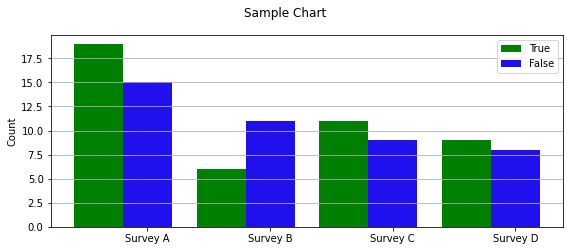

In [26]:
# buat data
pre = np.array([19, 6, 11, 9]) 
post = np.array([15, 11, 9, 8]) 
labels=['Survey '+x for x in list('ABCD')] 

# plot – kiri kemudian kanan
fig, ax = plt.subplots(figsize=(8, 3.5)) 
width = 0.4 # lebar bar
xlocs = np.arange(len(pre)) 
ax.bar(xlocs-width, pre, width,       
       color='green', label='True') 
ax.bar(xlocs, post, width,       
       color='#1f10ed', label='False')

# labels, grids dan title, kemudian simpan
ax.set_xticks(ticks=range(len(pre))) 
ax.set_xticklabels(labels) 
ax.yaxis.grid(True) 
ax.legend(loc='best') 
ax.set_ylabel('Count') 
fig.suptitle('Sample Chart') 
fig.tight_layout(pad=1) 

fig.savefig('barplot3.png', dpi=125) 

## Stacked bar 

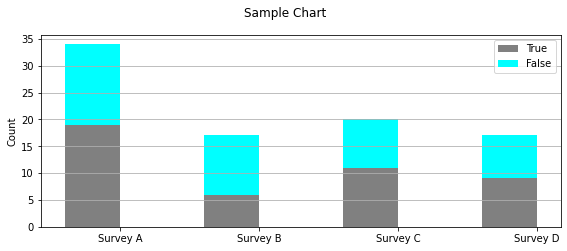

In [27]:
# buat data
pre = np.array([19, 6, 11, 9]) 
post = np.array([15, 11, 9, 8]) 
labels=['Survey '+x for x in list('ABCD')] 


fig, ax = plt.subplots(figsize=(8, 3.5)) 
width = 0.4 # bar width 
xlocs = np.arange(len(pre)+2) 
adjlocs = xlocs[1:-1] - width/2.0 
ax.bar(adjlocs, pre, width,       
       color='grey', label='True') 
ax.bar(adjlocs, post, width,       
       color='cyan', label='False',
       bottom=pre)

# labels, grids dan title, kemudian simpan
ax.set_xticks(ticks=xlocs[1:-1]) 
ax.set_xticklabels(labels) 
ax.yaxis.grid(True) 
ax.legend(loc='best') 
ax.set_ylabel('Count') 
fig.suptitle('Sample Chart') 
fig.tight_layout(pad=1) 
fig.savefig('Stacked.png', dpi=125) 

## Pie Chart – menggunakan ax.pie() 

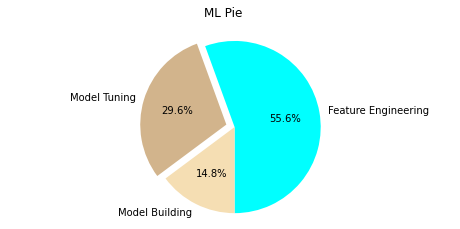

In [33]:
# buat data
data = np.array([15,8,4]) 
labels = ['Feature Engineering', 'Model Tuning', 'Model Building']
explode = (0, 0.1, 0) # tonjolkan fitur - Feature Engineering
colrs=['cyan', 'tan', 'wheat']
# plot 
fig, ax = plt.subplots(figsize=(8, 3.5)) 
ax.pie(data, explode=explode,     
       labels=labels, autopct='%1.1f%%',     
       startangle=270, colors=colrs) 
ax.axis('equal') # memastikan sebagai lingkaran

# tidy-up dan simpan
fig.suptitle("ML Pie") 
fig.savefig('pie.png', dpi=125)

## Plotting – defaults 

File konfigurasi Matplotlib menggunakan file konfigurasi untuk mengatur default. Untuk dapat mengeditnya, dapat ditemukan lokasi file konfigurasi sebagai berikut: 

In [34]:
print (matplotlib.matplotlib_fname()) 

c:\python\python38\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [35]:
# Pengaturan konfigurasi Pengaturan konfigurasi saat ini 

print (matplotlib.rcParams) 

_internal.classic_mode: False
agg.path.chunksize: 0
animation.avconv_args: []
animation.avconv_path: avconv
animation.bitrate: -1
animation.codec: h264
animation.convert_args: []
animation.convert_path: convert
animation.embed_limit: 20.0
animation.ffmpeg_args: []
animation.ffmpeg_path: ffmpeg
animation.frame_format: png
animation.html: none
animation.html_args: []
animation.writer: ffmpeg
axes.autolimit_mode: data
axes.axisbelow: line
axes.edgecolor: black
axes.facecolor: white
axes.formatter.limits: [-5, 6]
axes.formatter.min_exponent: 0
axes.formatter.offset_threshold: 4
axes.formatter.use_locale: False
axes.formatter.use_mathtext: False
axes.formatter.useoffset: True
axes.grid: False
axes.grid.axis: both
axes.grid.which: major
axes.labelcolor: black
axes.labelpad: 4.0
axes.labelsize: medium
axes.labelweight: normal
axes.linewidth: 0.8
axes.prop_cycle: cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
axes

In [36]:
# Ubah pengaturan default 

plt.rc('figure', figsize=(8,4), dpi=125,facecolor='white', edgecolor='white')
plt.rc('axes', facecolor='#e5e5e5',  grid=True, linewidth=1.0, axisbelow=True)
plt.rc('grid', color='white', linestyle='-',    linewidth=2.0, alpha=1.0) 
plt.rc('xtick', direction='out') 
plt.rc('ytick', direction='out') 
plt.rc('legend', loc='best') 
 

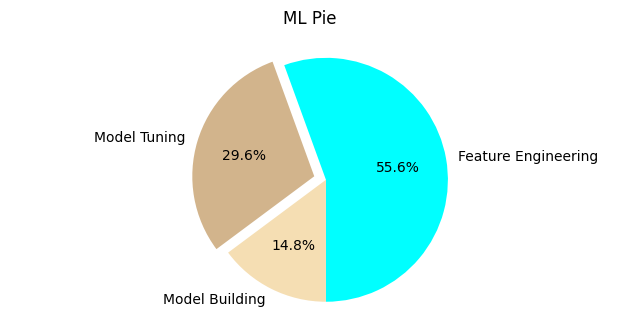

In [39]:
# buat data
data = np.array([15,8,4]) 
labels = ['Feature Engineering', 'Model Tuning', 'Model Building']
explode = (0, 0.1, 0) # tonjolkan fitur - Feature Engineering
colrs=['cyan', 'tan', 'wheat']
# plot 
fig, ax = plt.subplots(figsize=(8, 3.5)) 
ax.pie(data, explode=explode,     
       labels=labels, autopct='%1.1f%%',     
       startangle=270, colors=colrs) 
ax.axis('equal') # memastikan sebagai lingkaran

# tidy-up dan simpan
fig.suptitle("ML Pie") 
fig.savefig('pie.png', dpi=125)

In [38]:
# kembali ke setting awal
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)